<a href="https://colab.research.google.com/github/DavidHospinal/MPREAC-OCEANAPP/blob/main/01DeployOceanApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

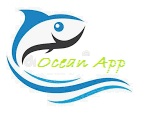

In [6]:
#@title Sistema para el reconocimiento de las especies en la pesca acompañante de cerco.

from IPython.display import Image
Image("/content/drive/MyDrive/Logo Ocean app.jpg")

Modelo
YOLO es una familia de modelos de detección de objetos a escala compuesta entrenados en COCO dataset, e incluye una funcionalidad simple para Test Time Augmentation (TTA), model ensembling, hyperparameter evolution, and export to ONNX, CoreML and TFLite.

In [24]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt gradio # install dependencies

In [25]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import gradio as gr
import torch
from PIL import Image

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/best.pt')  # local model  o google colab
def yolo(size, iou, conf, im):
    '''Wrapper fn for gradio'''
    g = (int(size) / max(im.size))  # gain
    im = im.resize((int(x * g) for x in im.size), Image.ANTIALIAS)  # resize

    model.iou = iou
    
    model.conf = conf

   
    results2 = model(im)  # inference
   
    results2.render()  # updates results.imgs with boxes and labels
    return Image.fromarray(results2.imgs[0])

#------------ Interface-------------
# Images
torch.hub.download_url_to_file('https://i.pinimg.com/564x/cb/94/cb/cb94cb5512a76ba7093ff536aad029d4.jpg', 'ejemplo1.jpg')
torch.hub.download_url_to_file('https://i.pinimg.com/564x/0c/ec/c4/0cecc4362ea1bf733a9cecf199763aae.jpg', 'ejemplo2.jpg')

#-----------
in1 = gr.inputs.Radio(['640', '1280'], label="Tamaño de la imagen", default='640', type='value')
in2 = gr.inputs.Slider(minimum=0, maximum=1, step=0.05, default=0.45, label='NMS IoU threshold')
in3 = gr.inputs.Slider(minimum=0, maximum=1, step=0.05, default=0.50, label='Umbral o  threshold')
in4 = gr.inputs.Image(type='pil', label="Original Image")

out2 = gr.outputs.Image(type="pil", label="YOLOv5")
#-------------- Text-----
title = 'Ocean App'
description = """
<p>
<center>
Sistema para el reconocimiento de las especies en la pesca acompañante de cerco, utilizando redes neuronales convolucionales para una empresa del sector pesquero en los puertos de Callao y Paracas. Advertencia solo usar fotos provenientes de las trampas Barceló, no de celular o foto de internet.
<img src="https://i.pinimg.com/564x/87/50/91/875091446f0f3d67cd15883711abec37.jpg" alt="logo" width="250"/>
</center>
</p>
"""
article = "<p style='text-align: center'><a href='https://docs.google.com/presentation/d/1T5CdcLSzgRe8cQpoi_sPB4U170551NGOrZNykcJD0xU/edit?usp=sharing' target='_blank'>Para mas info, clik para ir al white paper</a></p><p style='text-align: center'><a href='https://drive.google.com/drive/folders/1_UFdsguT6mJU-wS0gkp5YNQ_uBokLHJN?usp=sharing' target='_blank'>Google Colab Demo</a></p><p style='text-align: center'><a href='https://github.com/DavidHospinal/MPREAC-OCEANAPP' target='_blank'>Repo Github</a></p></center></p>"
          
examples = [['640',0.45, 0.75,'ejemplo1.jpg'], ['640',0.45, 0.75,'ejemplo2.jpg']]

iface = gr.Interface(yolo, inputs=[in1, in2, in3, in4], outputs=out2, title=title, description=description, article=article, examples=examples,theme="huggingface", analytics_enabled=False).launch(
    debug=True)

iface.launch()

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-6 Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


  0%|          | 0.00/114k [00:00<?, ?B/s]

  0%|          | 0.00/68.5k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:183: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please i

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().


Connected (version 2.0, client OpenSSH_7.6p1)
Authentication (publickey) successful!


Running on public URL: https://28753.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gradio/routes.py", line 276, in run_predict
    fn_index, raw_input, username, session_state, iterators
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 785, in process_api
    result = await self.call_function(fn_index, inputs, iterator)
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 695, in call_function
    block_fn.fn, *processed_input, limiter=self.limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/to_thread.py", line 32, in run_sync
    func, *args, cancellable=cancellable, limiter=limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-29-b559ab5ccc73>", line 15, in yolo
    return Image.fromarray(res